# Introduzione al Machine Learning 2023-2024
### Bernardini Jacopo, Ciocca Giorgio, Marini Tommaso
### Exam Project, First Part: Data Exploration, Clustering  and Classification

## 1) Data Exploration

Libraries import.

In [157]:
import numpy as np
import pandas as pd
import pylab as plt
from sklearn import metrics

File reading and substitution of 'notknown' values with NaNs 

In [158]:
filename = r'data\pums.csv'
data = pd.read_csv(filename, na_values='notknown')
data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,True
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,False
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,True
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,True


First data check.

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEP      746336 non-null  float64
 1   SCHL      709133 non-null  float64
 2   MAR       746336 non-null  float64
 3   RELP      709213 non-null  float64
 4   DIS       746336 non-null  float64
 5   ESP       746336 non-null  float64
 6   CIT       709287 non-null  float64
 7   MIG       746336 non-null  float64
 8   MIL       746336 non-null  float64
 9   ANC       746336 non-null  float64
 10  NATIVITY  708813 non-null  float64
 11  DEAR      708974 non-null  float64
 12  DEYE      709267 non-null  float64
 13  DREM      746336 non-null  float64
 14  SEX       746336 non-null  float64
 15  ESR       746336 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 91.1 MB


In [168]:
data.isnull().sum()

AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR        37362
DEYE        37069
DREM            0
SEX             0
ESR             0
dtype: int64

In [167]:
data.describe()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
count,746336.000000,709133.000000,746336.000000,709213.000000,746336.000000,746336.000000,709287.000000,746336.000000,746336.000000,746336.000000,708813.000000,708974.000000,709267.000000,746336.000000,746336.000000,746336.000000
mean,40.378314,15.426601,2.995578,2.679022,1.866040,0.617611,1.693518,1.247413,3.080612,1.757976,1.192635,1.960921,1.975131,1.844122,1.507907,0.453035
std,23.374484,6.381558,1.865125,4.336577,0.340609,1.678300,1.390452,0.675038,1.608065,1.097682,0.394369,0.193783,0.155727,0.485527,0.499938,0.497790
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,20.000000,13.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,40.000000,17.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,59.000000,20.000000,5.000000,2.000000,2.000000,0.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,94.000000,24.000000,5.000000,17.000000,2.000000,8.000000,5.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Having found that the number of null values in any feature is of the same order of magnitude, we check which rows present more than one NaN.
We check whether there are some completely corrupted instances to delete.

In [160]:
len(data[data.isnull().sum(axis=1)==6].index)

0

There are no completely empty rows to delete.

Replace Boolean target variable with 0 and 1

In [162]:
data=data.replace({False:0, True:1})
data.head()

C:\Users\giorg\AppData\Local\Temp\ipykernel_7876\2138369834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({False:0, True:1})


,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,0
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,0
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,1
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1


We calculate the correlation matrix in order to detect possible correlations to exploit.

In [163]:
data.corr()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
AGEP,1.000000,0.526318,-0.652526,-0.160553,-0.319932,-0.495892,0.136805,-0.094053,0.610013,-0.075151,0.159861,-0.240264,-0.127749,0.297545,0.045604,0.108214
SCHL,0.526318,1.000000,-0.437045,-0.106178,-0.034417,-0.534254,0.013117,0.051095,0.710749,-0.055516,0.026687,-0.036743,-0.002851,0.508846,0.020629,0.433160
MAR,-0.652526,-0.437045,1.000000,0.324343,0.084751,0.395482,-0.197440,0.091173,-0.486286,0.067081,-0.212588,0.100159,0.034025,-0.243272,-0.037797,-0.236155
RELP,-0.160553,-0.106178,0.324343,1.000000,-0.090447,0.028915,-0.007710,0.202360,-0.026641,0.051846,-0.018830,-0.004358,-0.043709,-0.090742,-0.041623,-0.141054
DIS,-0.319932,-0.034417,0.084751,-0.090447,1.000000,0.093754,0.037943,-0.000815,-0.102686,-0.006058,0.031085,0.512855,0.405873,0.190759,-0.004698,0.209605
ESP,-0.495892,-0.534254,0.395482,0.028915,0.093754,1.000000,-0.139069,-0.016679,-0.650507,0.037561,-0.145389,0.063005,0.038179,-0.286680,-0.014166,-0.323080
CIT,0.136805,0.013117,-0.197440,-0.007710,0.037943,-0.139069,1.000000,-0.010506,0.210177,-0.154963,0.975068,0.025188,-0.000428,0.109111,0.011768,0.108761
MIG,-0.094053,0.051095,0.091173,0.202360,-0.000815,-0.016679,-0.010506,1.000000,0.041475,0.032566,-0.018573,0.016514,-0.003608,0.034611,-0.011250,0.020511
MIL,0.610013,0.710749,-0.486286,-0.026641,-0.102686,-0.650507,0.210177,0.041475,1.000000,-0.072090,0.217732,-0.041023,-0.047215,0.391905,0.084040,0.455615
ANC,-0.075151,-0.055516,0.067081,0.051846,-0.006058,0.037561,-0.154963,0.032566,-0.072090,1.000000,-0.160468,0.000405,0.001006,-0.050561,0.003481,-0.022187


We note, for example, the correlation between the ``CIT`` and ``NATIVITY``.

We substitute the NaN values of DEYE and DEAR with the mode of the class, in this case 

In [179]:
data['DEYE'] = data['DEYE'].fillna(data['DEYE'].mode()[0])
data['DEAR'] = data['DEAR'].fillna(data['DEYE'].mode()[0])
data.isna().sum()

AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

dropping every row in which both CIT and NATIVITY are NaNs

In [142]:
cond = data['CIT'].isna() & data['NATIVITY'].isna()
data = data.loc[~cond]

<Axes: >

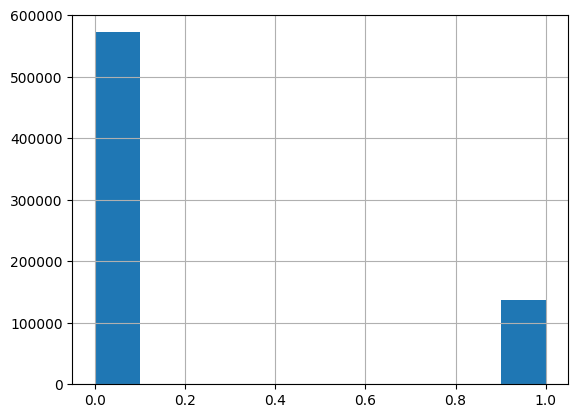

In [143]:
data['NATIVITY'] = data['NATIVITY'] - 1
data['NATIVITY'].hist()

In [144]:
#pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

reconstruction of NAT from CIT

In [145]:
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']<4), 'NATIVITY'] = 0
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']>3), 'NATIVITY'] = 1

checking whether we did everything correctly

In [146]:
#pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

Fill CIT from correlation with NATIVITY 

In [147]:
data.loc[(data['CIT'].isnull()) & (data['NATIVITY']==0), 'CIT'] = 1
data.loc[(data['CIT'].isnull()) & (data['NATIVITY']==1), 'CIT'] = np.random.randint(4,5)
data.isna().sum()

AGEP            0
SCHL        37103
MAR             0
RELP        37036
DIS             0
ESP             0
CIT             0
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

In [148]:
data=data.drop('RELP', axis=1)
data.isna().sum()

AGEP            0
SCHL        37103
MAR             0
DIS             0
ESP             0
CIT             0
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

Fill missing school by correlation with AGE

In [149]:
#pd.plotting.scatter_matrix(data[['SCHL','AGEP']])

In [150]:
data['SCHL_mode']=data.groupby('AGEP')['SCHL'].transform(lambda x: x.mode().iloc[0])
data['SCHL']=data['SCHL'].fillna(data['SCHL_mode'])
data.drop('SCHL_mode', axis=1, inplace=True)
data.isna().sum()

AGEP        0
SCHL        0
MAR         0
DIS         0
ESP         0
CIT         0
MIG         0
MIL         0
ANC         0
NATIVITY    0
DEAR        0
DEYE        0
DREM        0
SEX         0
ESR         0
dtype: int64

Checking everything is okay

In [151]:
#pd.plotting.scatter_matrix(data[['SCHL','AGEP']])

## 2) CLUSTERING

In [152]:
data_target = data['ESR']
data.drop('ESR', axis=1, inplace=True)

Normalization

In [153]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(data.values)

StandardScaler()

In [154]:
data_scaled=scaler.transform(data.values)

### K-means

In [155]:
from sklearn.cluster import KMeans

In [156]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=300)
kmeans.fit(data_scaled)

KeyboardInterrupt: 

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

In [ ]:
data_target.sum()

Visualization

Parallel coordinates

In [ ]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(data.columns)), data.columns, fontsize=8)
plt.legend(fontsize=20)
plt.show()


Labels clustering

In [ ]:
plt.scatter(data['AGEP'], data['MIL'], 
           c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('AGEP')
plt.ylabel('MIL')
plt.show()

Labels target

In [ ]:
plt.scatter(data['AGEP'], data['MIL'], 
           c=data_target, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('AGEP')
plt.ylabel('MIL')
plt.show()

In [ ]:
from math import pi
 
# number of variable
N = len(data.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], data.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


sse evaluation

In [ ]:
print('SSE %s' % kmeans.inertia_)
#print('Silhouette %s' % metrics.silhouette_score(data_scaled, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(data_scaled, kmeans.labels_))
sse_list = list()
max_k = 25
for k in range(2, max_k + 1):
    print(k)
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(data_scaled)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [ ]:
sse_list

In [ ]:
plt.plot(range(2, len(sse_list) + 2), sse_list, 'o--')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.show()

In [ ]:
diff = []
for i in range(len(sse_list)-1):
    diff.append(-sse_list[i+1]+sse_list[i])
plt.plot(range(2, len(sse_list) + 1), diff, 'o--')
plt.ylabel('diff SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.show()

Le differenze tra le sse non cambiano più quando k=11, quindi è quello ottimale

External evaluation

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
kmeans.fit(data_scaled)

In [ ]:
#Similarity between assignments
metrics.adjusted_rand_score(data_target, kmeans.labels_)

In [ ]:
#are cluster composed of objects with the same real labels?
metrics.homogeneity_score(data_target, kmeans.labels_) #homogenity score

In [ ]:
#are real labels concentrated in specific clusters?
metrics.completeness_score(data_target, kmeans.labels_)

In [ ]:
#harmonic mean between completeness_score and homogeneity_score
metrics.v_measure_score(data_target, kmeans.labels_, beta=2) 

famo la confusion matrix

In [ ]:
metrics.confusion_matrix(data_target, kmeans.labels_)

In [ ]:
### DBSCAN
#non si fa perche fa caa dioporco scan

### Hierirchical clustering dislessico porcodio

In [ ]:
### Gerarchia dei Cumulanti italici
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

#prendo un po' di dati random perchè un gna fa
N = 1000
data['ESR'] = data_target  
data_random = data.sample(N)
data_random_target = data_random['ESR']
data_random.drop('ESR', axis=1)
scaler.fit(data_random.values)
data_random_scaled=scaler.transform(data_random.values)

In [ ]:
data_dist = pdist(data_random_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.1, truncate_mode='lastp')
clusters = cut_tree(data_link, n_clusters=2).flatten()

Devi prednere sample anche dal target

In [ ]:
metrics.confusion_matrix(data_random_target, clusters)

## 3) Classification

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report

Add the target variable

In [ ]:
data['ESR']=data_target
data.head()

prepare decision tree

In [ ]:
predictors = [col for col in data.columns if col != 'ESR']
X = data[predictors].values
y = data['ESR']

Split in training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

Build decision tree

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

Features iportance

In [ ]:
for col, imp in zip(predictors, clf.feature_importances_):
    print(col, imp)
print(clf.classes_)

Apply on training set 

In [ ]:
y_pred = clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Apply on test set

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Study possible overfitting and tune hyperparameters

In [ ]:
acc_train = list()
acc_test = list()
samples=np.linspace(0,5000,50,dtype=int)+1

for min_samples in samples:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=1500, min_samples_leaf=min_samples)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))

In [ ]:
plt.plot(samples, acc_train, 'o--', color='red', label="Train set")
plt.plot(samples, acc_test, 'o--', color='blue', label= "Test set")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
acc_train = list()
acc_test = list()
samples=[50, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]

for min_samples in samples:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=min_samples, min_samples_leaf=20)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))

In [ ]:
samples=[50, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
plt.plot(samples, acc_train, 'o--', color='red', label="Train set")
plt.plot(samples, acc_test, 'o--', color='blue', label= "Test set")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We concliude that the best parameters are min_samples_leaf=20 min_samples_split=1500

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=1500, min_samples_leaf=20)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy Test %s' % accuracy_score(y_test, y_pred))
print('F1-score Test %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred, average=None)

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area={roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std() * 2))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=1500, 
                             min_samples_leaf=20, 
                             class_weight=None)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

parameter tuning

In [ ]:
acc_train = list()
acc_test = list()
samples=np.linspace(1,len(data.keys())-1,len(data.keys())-1,dtype=int)

for features in samples:
    clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=1500, 
                             min_samples_leaf=20, 
                             max_features=features,
                             class_weight=None)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))

ROC curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred, average=None)

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area={roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Cross Validation

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))